#import the dependencies

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [7]:
# import requests
import requests
#get API key
from config import weather_api_key
#Build base url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kayes
Processing Record 2 of Set 1 | tautira
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 5 of Set 1 | constitucion
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | fairbanks
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | vardo
Processing Record 11 of Set 1 | kibala
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | george
Processing Record 14 of Set 1 | yumen
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | ancud
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | san patricio
Processing Record 19 of Set 1 | taylor
Processing Record 20 of Set 1 | vila
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | breda

In [9]:
len(city_data)

561

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kayes,14.0000,-11.0000,86.92,14,100,6.26,ML,2021-12-17 21:15:57
1,Tautira,-17.7333,-149.1500,86.02,65,55,12.06,PF,2021-12-17 21:15:57
2,Bethel,41.3712,-73.4140,56.01,31,1,5.75,US,2021-12-17 21:11:36
3,Constitucion,-35.3333,-72.4167,63.72,58,0,14.99,CL,2021-12-17 21:15:58
4,Jamestown,42.0970,-79.2353,43.09,57,1,3.00,US,2021-12-17 21:12:57
5,Punta Arenas,-53.1500,-70.9167,55.51,67,75,11.50,CL,2021-12-17 21:15:58
6,Fairbanks,64.8378,-147.7164,7.61,83,90,0.00,US,2021-12-17 21:15:26
7,Ribeira Grande,38.5167,-28.7000,59.40,58,20,8.05,PT,2021-12-17 21:15:59
8,Vardo,70.3705,31.1107,30.18,93,75,16.11,NO,2021-12-17 21:13:50
9,Kibala,9.1104,18.3463,76.95,44,0,6.91,TD,2021-12-17 21:15:59


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kayes,ML,2021-12-17 21:15:57,14.0000,-11.0000,86.92,14,100,6.26
1,Tautira,PF,2021-12-17 21:15:57,-17.7333,-149.1500,86.02,65,55,12.06
2,Bethel,US,2021-12-17 21:11:36,41.3712,-73.4140,56.01,31,1,5.75
3,Constitucion,CL,2021-12-17 21:15:58,-35.3333,-72.4167,63.72,58,0,14.99
4,Jamestown,US,2021-12-17 21:12:57,42.0970,-79.2353,43.09,57,1,3.00
5,Punta Arenas,CL,2021-12-17 21:15:58,-53.1500,-70.9167,55.51,67,75,11.50
6,Fairbanks,US,2021-12-17 21:15:26,64.8378,-147.7164,7.61,83,90,0.00
7,Ribeira Grande,PT,2021-12-17 21:15:59,38.5167,-28.7000,59.40,58,20,8.05
8,Vardo,NO,2021-12-17 21:13:50,70.3705,31.1107,30.18,93,75,16.11
9,Kibala,TD,2021-12-17 21:15:59,9.1104,18.3463,76.95,44,0,6.91


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

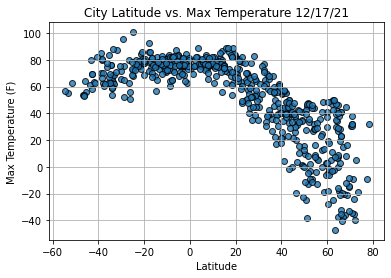

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

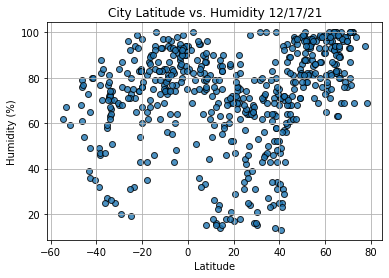

In [18]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

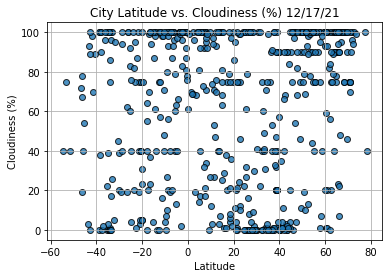

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

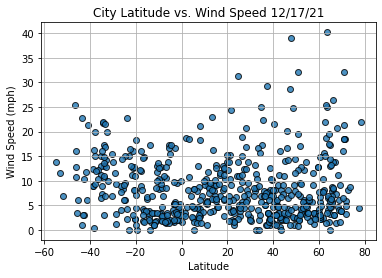

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [26]:
index13 = city_data_df.loc[13]
index13

City                         Hilo
Country                        US
Date          2021-12-17 21:16:00
Lat                       19.7297
Lng                       -155.09
Max Temp                    83.28
Humidity                       52
Cloudiness                     75
Wind Speed                   13.8
Name: 13, dtype: object

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kayes,ML,2021-12-17 21:15:57,14.0000,-11.0000,86.92,14,100,6.26
2,Bethel,US,2021-12-17 21:11:36,41.3712,-73.4140,56.01,31,1,5.75
4,Jamestown,US,2021-12-17 21:12:57,42.0970,-79.2353,43.09,57,1,3.00
6,Fairbanks,US,2021-12-17 21:15:26,64.8378,-147.7164,7.61,83,90,0.00
7,Ribeira Grande,PT,2021-12-17 21:15:59,38.5167,-28.7000,59.40,58,20,8.05


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

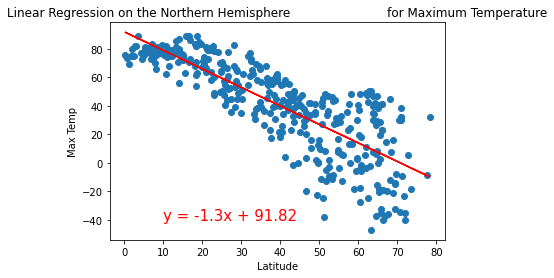

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-40))